### Importación de datos



In [15]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [8]:
dataframes = [tienda, tienda2, tienda3, tienda4]
sumas = [df['Precio'].sum() for df in dataframes]

In [9]:
sumas

[np.float64(1150880400.0),
 np.float64(1116343500.0),
 np.float64(1098019600.0),
 np.float64(1038375700.0)]

In [10]:
dataframes = [tienda, tienda2, tienda3, tienda4]
sumas = [df['Precio'].sum() for df in dataframes]

# Mostrar con texto
for i, total in enumerate(sumas, start=1):
    print(f"Tienda {i} vendió {float(total):,.2f}")

Tienda 1 vendió 1,150,880,400.00
Tienda 2 vendió 1,116,343,500.00
Tienda 3 vendió 1,098,019,600.00
Tienda 4 vendió 1,038,375,700.00


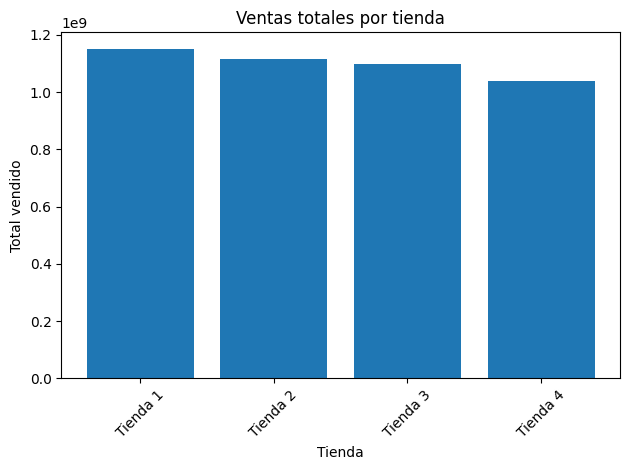

In [16]:
import matplotlib.pyplot as plt

#dataframes
dataframes = [tienda, tienda2, tienda3, tienda4]
sumas = [df['Precio'].sum() for df in dataframes]

# Creamos etiquetas (Tienda 1, Tienda 2, ...)
etiquetas = [f"Tienda {i}" for i in range(1, len(sumas)+1)]

# Gráfico de barras
plt.bar(etiquetas, sumas)
plt.title("Ventas totales por tienda")
plt.xlabel("Tienda")
plt.ylabel("Total vendido")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 2. Ventas por categoría


=== Tienda 1 ===
Categoría Artículos para el hogar vendió 12,698,400.00
Categoría Deportes y diversión vendió 39,290,000.00
Categoría Electrodomésticos vendió 363,685,200.00
Categoría Electrónicos vendió 429,493,500.00
Categoría Instrumentos musicales vendió 91,299,000.00
Categoría Juguetes vendió 17,995,700.00
Categoría Libros vendió 8,784,900.00
Categoría Muebles vendió 187,633,700.00


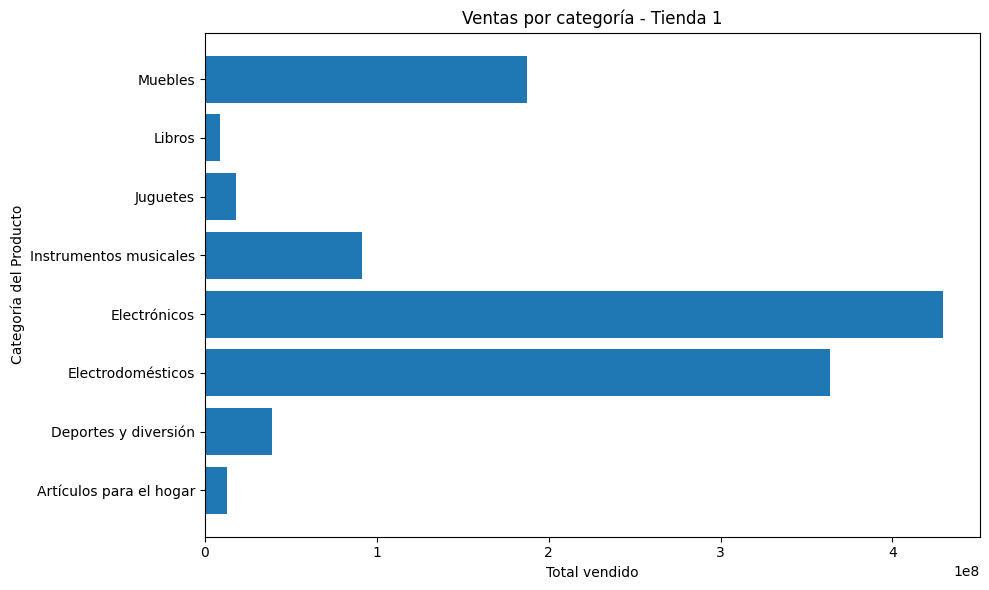


=== Tienda 2 ===
Categoría Artículos para el hogar vendió 14,746,900.00
Categoría Deportes y diversión vendió 34,744,500.00
Categoría Electrodomésticos vendió 348,567,800.00
Categoría Electrónicos vendió 410,831,100.00
Categoría Instrumentos musicales vendió 104,990,300.00
Categoría Juguetes vendió 15,945,400.00
Categoría Libros vendió 10,091,200.00
Categoría Muebles vendió 176,426,300.00


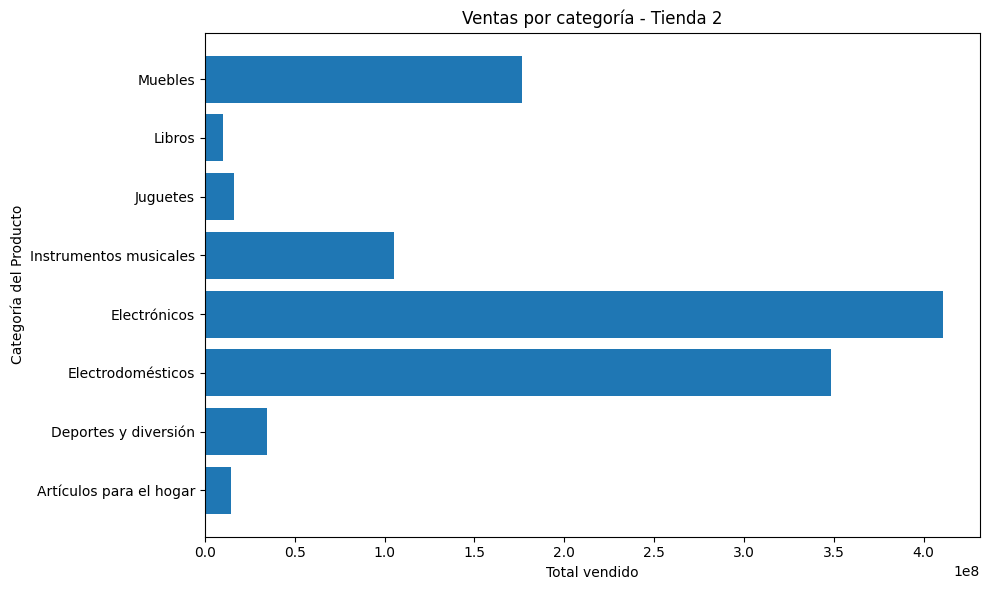


=== Tienda 3 ===
Categoría Artículos para el hogar vendió 15,060,000.00
Categoría Deportes y diversión vendió 35,593,100.00
Categoría Electrodomésticos vendió 329,237,900.00
Categoría Electrónicos vendió 410,775,800.00
Categoría Instrumentos musicales vendió 77,380,900.00
Categoría Juguetes vendió 19,401,100.00
Categoría Libros vendió 9,498,700.00
Categoría Muebles vendió 201,072,100.00


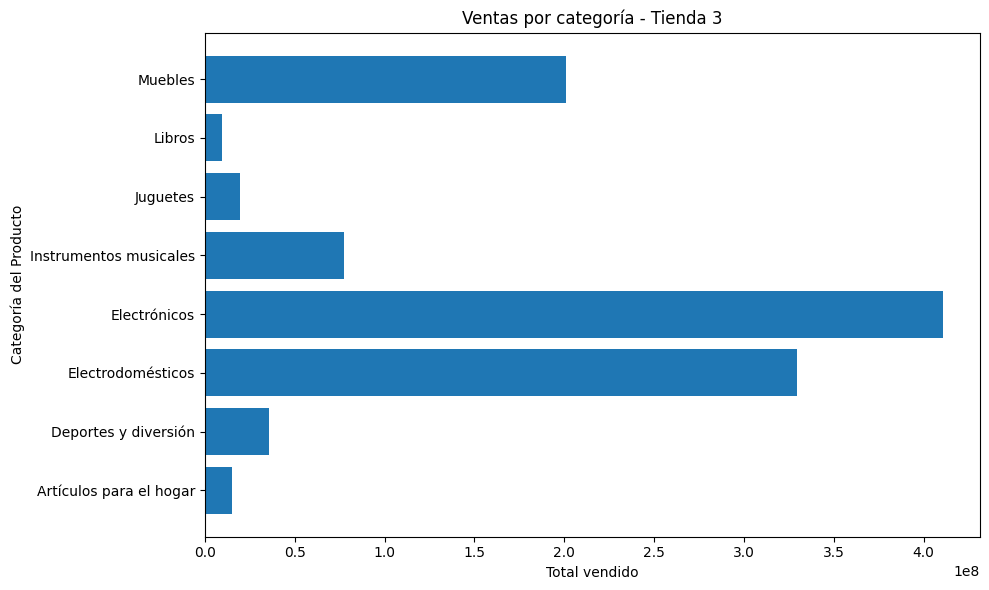


=== Tienda 4 ===
Categoría Artículos para el hogar vendió 15,074,500.00
Categoría Deportes y diversión vendió 33,350,100.00
Categoría Electrodomésticos vendió 283,260,200.00
Categoría Electrónicos vendió 409,476,100.00
Categoría Instrumentos musicales vendió 75,102,400.00
Categoría Juguetes vendió 20,262,200.00
Categoría Libros vendió 9,321,300.00
Categoría Muebles vendió 192,528,900.00


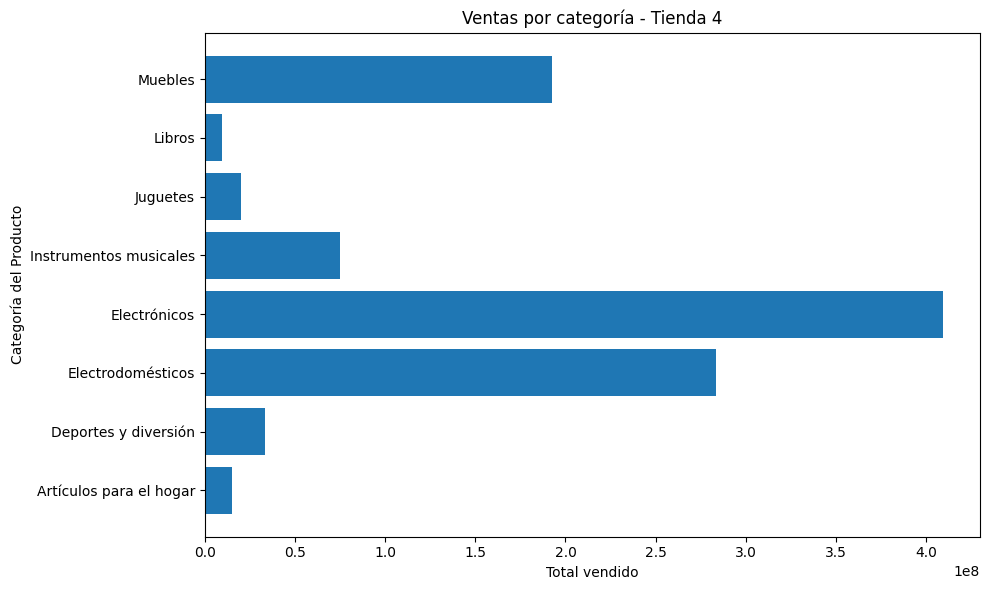

In [21]:
import matplotlib.pyplot as plt

# Lista de DataFrames y nombres de tiendas
dataframes = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = [f"Tienda {i}" for i in range(1, len(dataframes)+1)]

# Recorremos cada tienda
for nombre, df in zip(nombres_tiendas, dataframes):
    print(f"\n=== {nombre} ===")

    # Agrupar por categoría y sumar precios
    ventas_categoria = df.groupby("Categoría del Producto")["Precio"].sum().reset_index()

    # Mostrar resultados en texto
    for _, fila in ventas_categoria.iterrows():
        print(f"Categoría {fila['Categoría del Producto']} vendió {fila['Precio']:,.2f}")

    # Gráfico de barras para cada tienda
    plt.figure(figsize=(10,6))
    plt.barh(ventas_categoria["Categoría del Producto"], ventas_categoria["Precio"])
    plt.title(f"Ventas por categoría - {nombre}")
    plt.xlabel("Total vendido")
    plt.ylabel("Categoría del Producto")
    plt.tight_layout()
    plt.show()


# 3. Calificación promedio de la tienda


In [22]:
# Lista de DataFrames y nombres
dataframes = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = [f"Tienda {i}" for i in range(1, len(dataframes)+1)]

# Calificación promedio por tienda
for nombre, df in zip(nombres_tiendas, dataframes):
    promedio = df["Calificación"].mean()
    print(f"{nombre} tiene una calificación promedio de {promedio:.2f}")


Tienda 1 tiene una calificación promedio de 3.98
Tienda 2 tiene una calificación promedio de 4.04
Tienda 3 tiene una calificación promedio de 4.05
Tienda 4 tiene una calificación promedio de 4.00


Tienda 1 tiene una calificación promedio de 3.98
Tienda 2 tiene una calificación promedio de 4.04
Tienda 3 tiene una calificación promedio de 4.05
Tienda 4 tiene una calificación promedio de 4.00


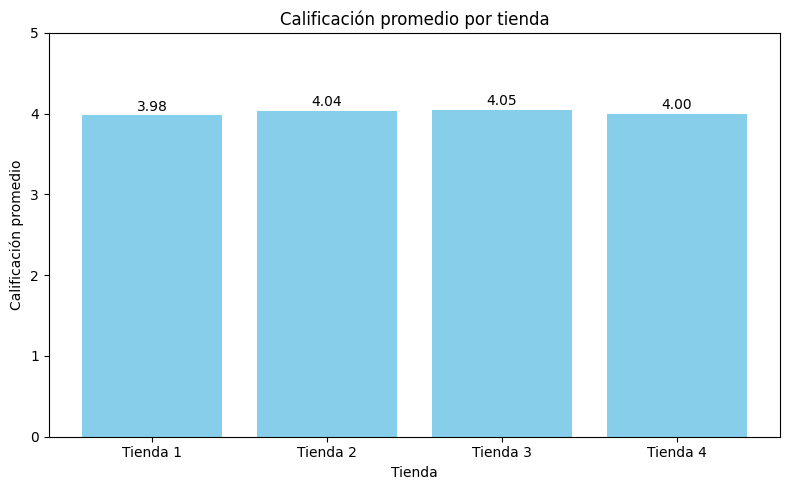

In [23]:
import matplotlib.pyplot as plt

# Lista de DataFrames y nombres
dataframes = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = [f"Tienda {i}" for i in range(1, len(dataframes)+1)]

# Lista para guardar promedios
promedios = []

# Calcular y mostrar calificación promedio por tienda
for nombre, df in zip(nombres_tiendas, dataframes):
    promedio = df["Calificación"].mean()
    promedios.append(promedio)
    print(f"{nombre} tiene una calificación promedio de {promedio:.2f}")

# Gráfico de barras
plt.figure(figsize=(8,5))
bars = plt.bar(nombres_tiendas, promedios, color='skyblue')

# Añadir valores encima de cada barra
for bar in bars:
    altura = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, altura + 0.02, f"{altura:.2f}", ha='center', va='bottom')

plt.ylim(0, 5)  # Si la calificación es de 0 a 5
plt.title("Calificación promedio por tienda")
plt.ylabel("Calificación promedio")
plt.xlabel("Tienda")
plt.tight_layout()
plt.show()


# 4. Productos más y menos vendidos

In [24]:
# Lista de DataFrames y nombres
dataframes = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = [f"Tienda {i}" for i in range(1, len(dataframes)+1)]

for nombre, df in zip(nombres_tiendas, dataframes):
    print(f"\n=== {nombre} ===")

    # Contar cuántas veces se vendió cada producto
    conteo = df['Producto'].value_counts()

    # Producto más vendido
    producto_max = conteo.idxmax()
    cantidad_max = conteo.max()

    # Producto menos vendido
    producto_min = conteo.idxmin()
    cantidad_min = conteo.min()

    print(f"Producto más vendido: {producto_max} ({cantidad_max} ventas)")
    print(f"Producto menos vendido: {producto_min} ({cantidad_min} ventas)")



=== Tienda 1 ===
Producto más vendido: Microondas (60 ventas)
Producto menos vendido: Auriculares con micrófono (33 ventas)

=== Tienda 2 ===
Producto más vendido: Iniciando en programación (65 ventas)
Producto menos vendido: Juego de mesa (32 ventas)

=== Tienda 3 ===
Producto más vendido: Kit de bancas (57 ventas)
Producto menos vendido: Bloques de construcción (35 ventas)

=== Tienda 4 ===
Producto más vendido: Cama box (62 ventas)
Producto menos vendido: Guitarra eléctrica (33 ventas)



=== Tienda 1 ===
Producto más vendido: Microondas (60 ventas)
Producto menos vendido: Auriculares con micrófono (33 ventas)


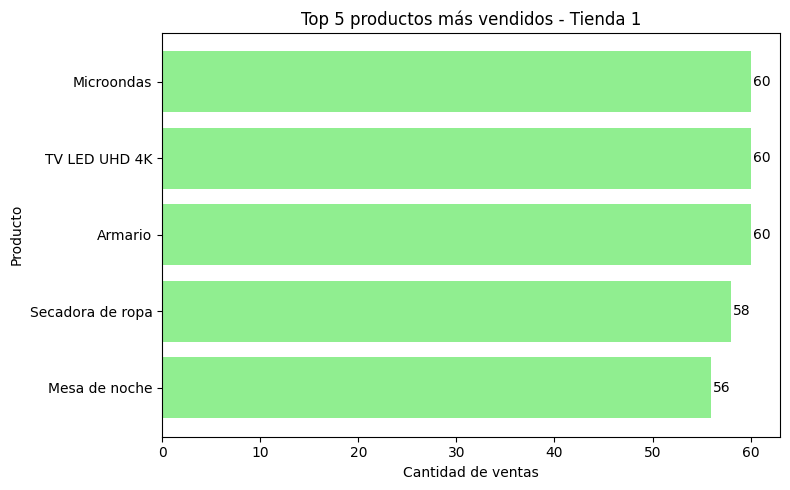


=== Tienda 2 ===
Producto más vendido: Iniciando en programación (65 ventas)
Producto menos vendido: Juego de mesa (32 ventas)


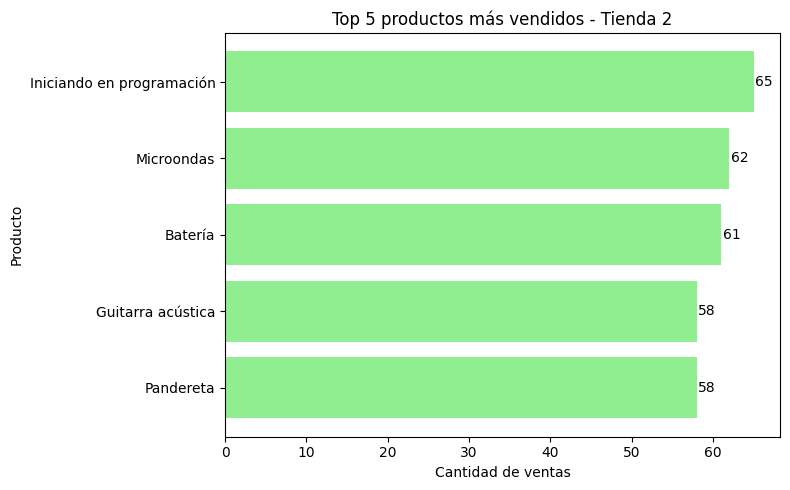


=== Tienda 3 ===
Producto más vendido: Kit de bancas (57 ventas)
Producto menos vendido: Bloques de construcción (35 ventas)


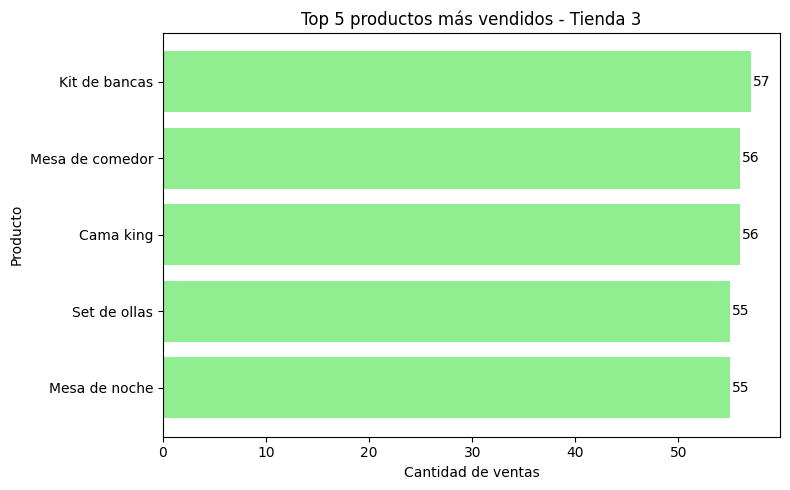


=== Tienda 4 ===
Producto más vendido: Cama box (62 ventas)
Producto menos vendido: Guitarra eléctrica (33 ventas)


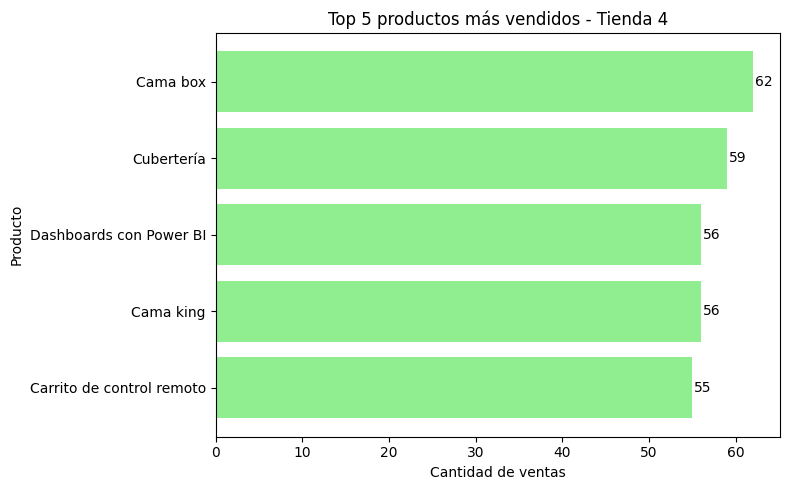

In [25]:
import matplotlib.pyplot as plt

# Lista de DataFrames y nombres
dataframes = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = [f"Tienda {i}" for i in range(1, len(dataframes)+1)]

for nombre, df in zip(nombres_tiendas, dataframes):
    print(f"\n=== {nombre} ===")

    # Contar cuántas veces se vendió cada producto
    conteo = df['Producto'].value_counts()

    # Mostrar los más y menos vendidos
    producto_max = conteo.idxmax()
    cantidad_max = conteo.max()
    producto_min = conteo.idxmin()
    cantidad_min = conteo.min()
    print(f"Producto más vendido: {producto_max} ({cantidad_max} ventas)")
    print(f"Producto menos vendido: {producto_min} ({cantidad_min} ventas)")

    # Top 5 productos más vendidos
    top5 = conteo.head(5)

    # Gráfico de barras horizontal
    plt.figure(figsize=(8,5))
    plt.barh(top5.index[::-1], top5.values[::-1], color='lightgreen')  # invertimos para que el más vendido quede arriba
    plt.title(f"Top 5 productos más vendidos - {nombre}")
    plt.xlabel("Cantidad de ventas")
    plt.ylabel("Producto")

    # Mostrar los valores encima de las barras
    for i, v in enumerate(top5.values[::-1]):
        plt.text(v + 0.2, i, str(v), va='center')

    plt.tight_layout()
    plt.show()


# 5. Envío promedio por tienda

In [26]:
# Lista de DataFrames y nombres
dataframes = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = [f"Tienda {i}" for i in range(1, len(dataframes)+1)]

# Lista para guardar promedios
promedios_envio = []

# Calcular y mostrar costo de envío promedio por tienda
for nombre, df in zip(nombres_tiendas, dataframes):
    promedio = df["Costo de envío"].mean()
    promedios_envio.append(promedio)
    print(f"{nombre} tiene un costo de envío promedio de ${promedio:,.2f}")


Tienda 1 tiene un costo de envío promedio de $26,018.61
Tienda 2 tiene un costo de envío promedio de $25,216.24
Tienda 3 tiene un costo de envío promedio de $24,805.68
Tienda 4 tiene un costo de envío promedio de $23,459.46


Tienda 1 tiene un costo de envío promedio de $26,018.61
Tienda 2 tiene un costo de envío promedio de $25,216.24
Tienda 3 tiene un costo de envío promedio de $24,805.68
Tienda 4 tiene un costo de envío promedio de $23,459.46


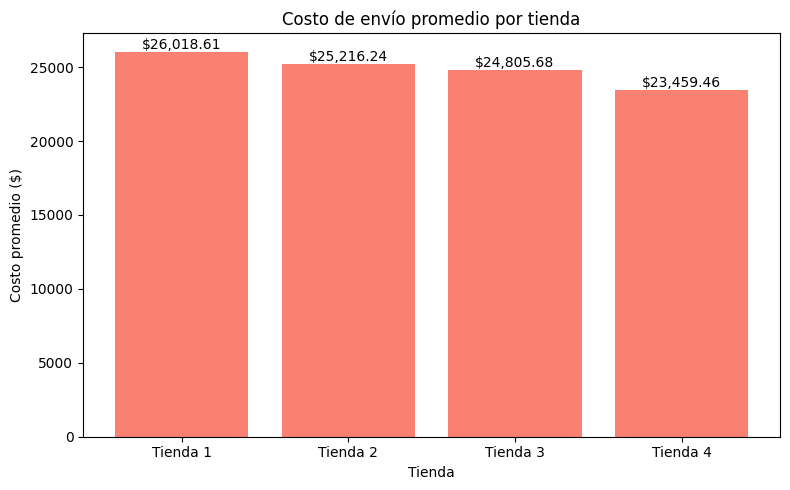

In [28]:
import matplotlib.pyplot as plt

# Lista de DataFrames y nombres
dataframes = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = [f"Tienda {i}" for i in range(1, len(dataframes)+1)]

# Lista para guardar promedios
promedios_envio = []

# Calcular y mostrar costo de envío promedio por tienda
for nombre, df in zip(nombres_tiendas, dataframes):
    promedio = df["Costo de envío"].mean()
    promedios_envio.append(promedio)
    print(f"{nombre} tiene un costo de envío promedio de ${promedio:,.2f}")

# Gráfico de barras
plt.figure(figsize=(8,5))
bars = plt.bar(nombres_tiendas, promedios_envio, color='salmon')

# Añadir valores encima de cada barra
for bar in bars:
    altura = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, altura + 0.5, f"${altura:,.2f}", ha='center', va='bottom')

plt.title("Costo de envío promedio por tienda")
plt.ylabel("Costo promedio ($)")
plt.xlabel("Tienda")
plt.tight_layout()
plt.show()


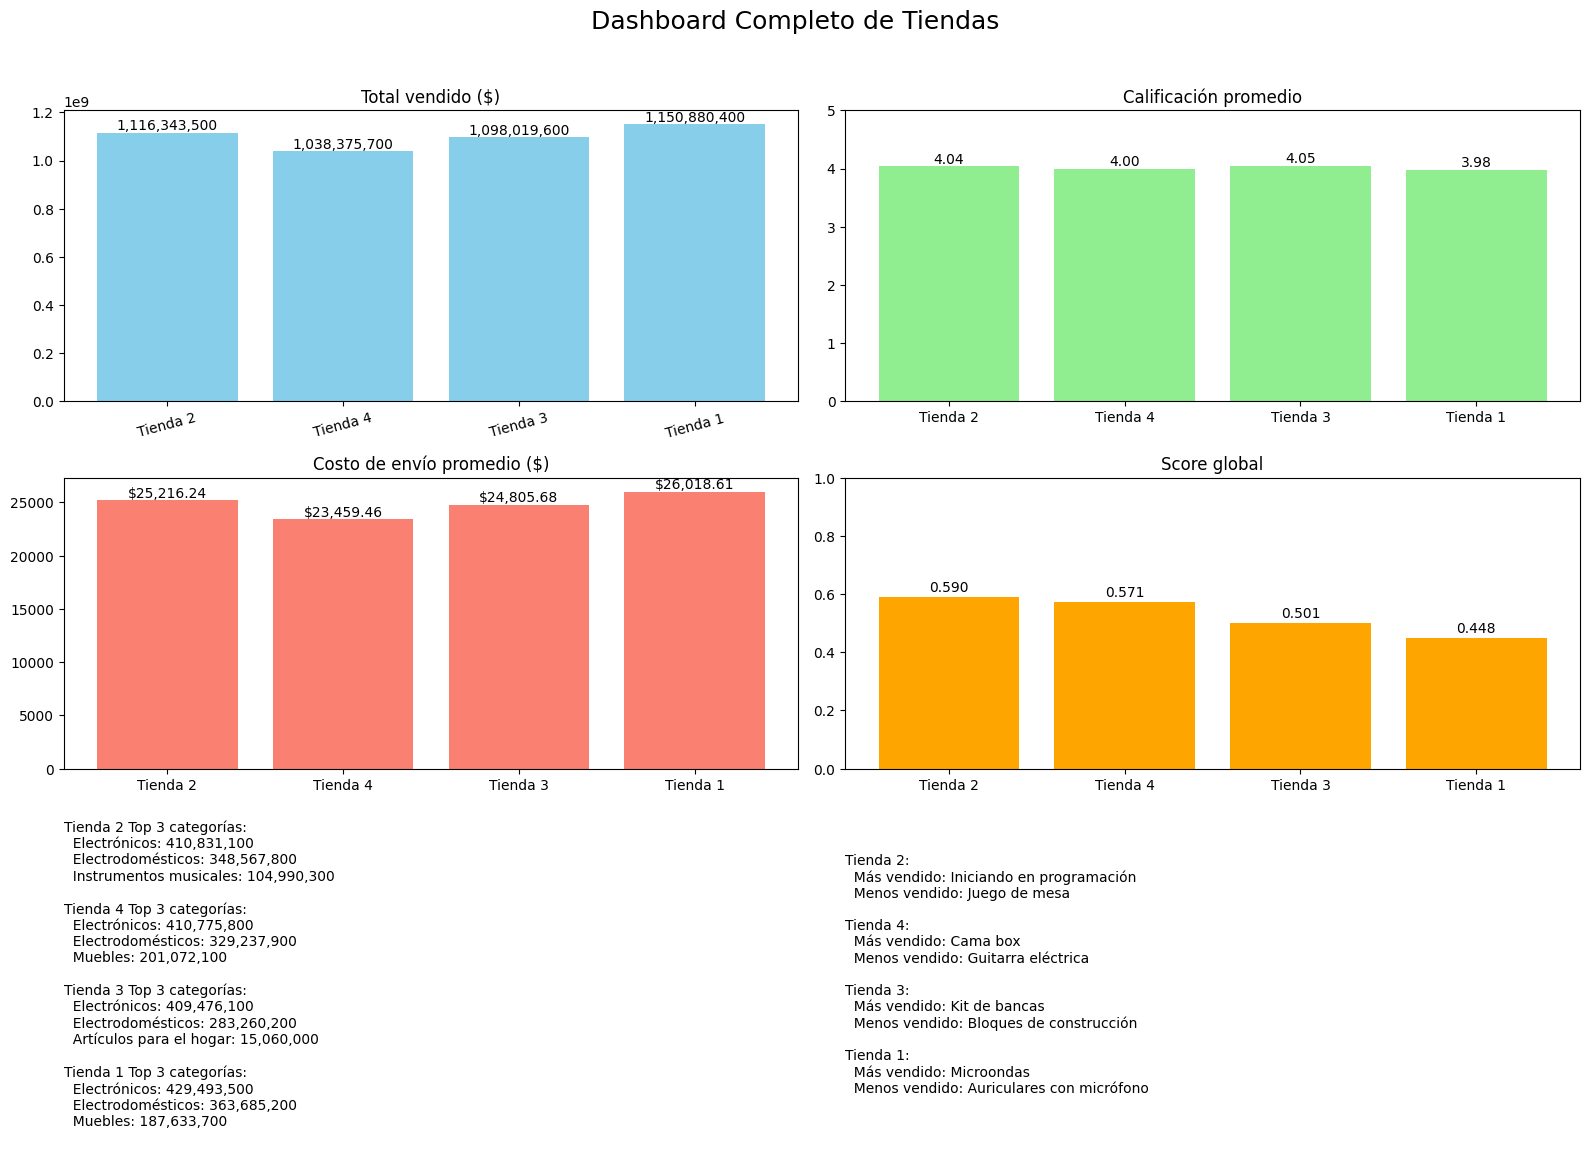

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# =========================
# Datos principales
# =========================
data = {
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Total vendido": [1150880400, 1116343500, 1098019600, 1038375700],
    "Calificación": [3.98, 4.04, 4.05, 4.00],
    "Costo envío": [26018.61, 25216.24, 24805.68, 23459.46]
}
df = pd.DataFrame(data)

# Ventas por categoría (top 3)
categorias = {
    "Tienda 1": {"Electrónicos": 429493500, "Electrodomésticos": 363685200, "Muebles": 187633700},
    "Tienda 2": {"Electrónicos": 410831100, "Electrodomésticos": 348567800, "Instrumentos musicales": 104990300},
    "Tienda 3": {"Electrónicos": 409476100, "Electrodomésticos": 283260200, "Artículos para el hogar": 15060000},
    "Tienda 4": {"Electrónicos": 410775800, "Electrodomésticos": 329237900, "Muebles": 201072100}
}

# Productos más y menos vendidos
productos = {
    "Tienda 1": ("Microondas", "Auriculares con micrófono"),
    "Tienda 2": ("Iniciando en programación", "Juego de mesa"),
    "Tienda 3": ("Kit de bancas", "Bloques de construcción"),
    "Tienda 4": ("Cama box", "Guitarra eléctrica")
}

# =========================
# Score de categorías
# =========================
contrib_cat = []
for tienda in df["Tienda"]:
    total_cat = sum(categorias[tienda].values())
    contrib_cat.append(total_cat / df[df["Tienda"] == tienda]["Total vendido"].values[0])
df["Cat_score"] = contrib_cat

# Normalizar métricas
df["Ventas_norm"] = (df["Total vendido"] - df["Total vendido"].min()) / (df["Total vendido"].max() - df["Total vendido"].min())
df["Calif_norm"] = (df["Calificación"] - df["Calificación"].min()) / (df["Calificación"].max() - df["Calificación"].min())
df["Envio_norm"] = 1 - (df["Costo envío"] - df["Costo envío"].min()) / (df["Costo envío"].max() - df["Costo envío"].min())
df["Cat_norm"] = (df["Cat_score"] - df["Cat_score"].min()) / (df["Cat_score"].max() - df["Cat_score"].min())
df["Score_global"] = (df["Ventas_norm"] + df["Calif_norm"] + df["Envio_norm"] + df["Cat_norm"]) / 4

df = df.sort_values(by="Score_global", ascending=False).reset_index(drop=True)

# =========================
# Dashboard visual
# =========================
fig, axes = plt.subplots(3, 2, figsize=(16,12))
fig.suptitle("Dashboard Completo de Tiendas", fontsize=18)

# 1️⃣ Total vendido
axes[0,0].bar(df["Tienda"], df["Total vendido"], color='skyblue')
axes[0,0].set_title("Total vendido ($)")
axes[0,0].tick_params(axis='x', rotation=15)
for i, val in enumerate(df["Total vendido"]):
    axes[0,0].text(i, val + max(df["Total vendido"])*0.01, f"{val:,.0f}", ha='center')

# 2️⃣ Calificación promedio
axes[0,1].bar(df["Tienda"], df["Calificación"], color='lightgreen')
axes[0,1].set_title("Calificación promedio")
axes[0,1].set_ylim(0,5)
for i, val in enumerate(df["Calificación"]):
    axes[0,1].text(i, val + 0.05, f"{val:.2f}", ha='center')

# 3️⃣ Costo de envío promedio
axes[1,0].bar(df["Tienda"], df["Costo envío"], color='salmon')
axes[1,0].set_title("Costo de envío promedio ($)")
for i, val in enumerate(df["Costo envío"]):
    axes[1,0].text(i, val + max(df["Costo envío"])*0.01, f"${val:,.2f}", ha='center')

# 4️⃣ Score global
axes[1,1].bar(df["Tienda"], df["Score_global"], color='orange')
axes[1,1].set_title("Score global")
axes[1,1].set_ylim(0,1)
for i, val in enumerate(df["Score_global"]):
    axes[1,1].text(i, val + 0.02, f"{val:.3f}", ha='center')

# 5️⃣ Top 3 categorías por tienda (texto)
text_cat = ""
for tienda in df["Tienda"]:
    top_cat = categorias[tienda]
    text_cat += f"{tienda} Top 3 categorías:\n"
    for cat, val in top_cat.items():
        text_cat += f"  {cat}: {val:,.0f}\n"
    text_cat += "\n"
axes[2,0].axis('off')
axes[2,0].text(0, 0.5, text_cat, fontsize=10, va='center', ha='left')

# 6️⃣ Producto más y menos vendido (texto)
text_prod = ""
for tienda in df["Tienda"]:
    text_prod += f"{tienda}:\n  Más vendido: {productos[tienda][0]}\n  Menos vendido: {productos[tienda][1]}\n\n"
axes[2,1].axis('off')
axes[2,1].text(0, 0.5, text_prod, fontsize=10, va='center', ha='left')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



# Análisis Integral de Desempeño de Tiendas y Recomendación Estratégica

## 1. Objetivo del Análisis
El presente análisis tiene como objetivo evaluar el desempeño de cuatro tiendas, utilizando un **Score global** que combina múltiples métricas clave: volumen de ventas, satisfacción del cliente, costos logísticos y relevancia de las categorías de productos. Con base en esta evaluación, se determina cuál tienda sería la más adecuada para “vender” o reorganizar, en un escenario donde se planea abrir un nuevo negocio.  

---

## 2. Metodología

### 2.1 Variables consideradas
Se seleccionaron las siguientes métricas fundamentales para evaluar la eficiencia y sostenibilidad de cada tienda:  
1. **Ventas totales**  
2. **Calificación promedio**  
3. **Costo de envío promedio**  
4. **Contribución de categorías fuertes**  

### 2.2 Normalización y ponderación
- Cada métrica se normalizó mediante la técnica **min-max scaling**  
- El **Score global** se calculó como el promedio simple de las cuatro métricas normalizadas

---

## 3. Resultados

### 3.1 Score global de tiendas
| Posición | Tienda    | Score Global |
|-----------|-----------|--------------|
| 1 | Tienda 2 | 0.590 |
| 2 | Tienda 4 | 0.571 |
| 3 | Tienda 3 | 0.501 |
| 4 | Tienda 1 | 0.448 |


### 3.2 Gráficos

**Total vendido por tienda ($)**

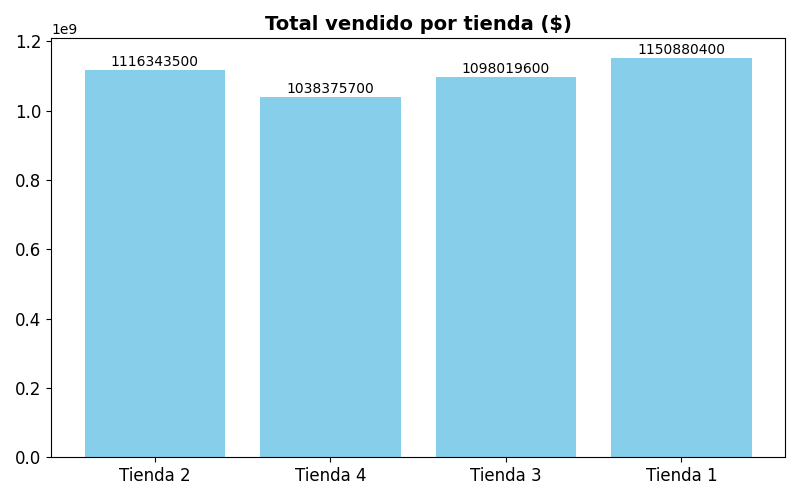

**Calificación promedio de clientes**

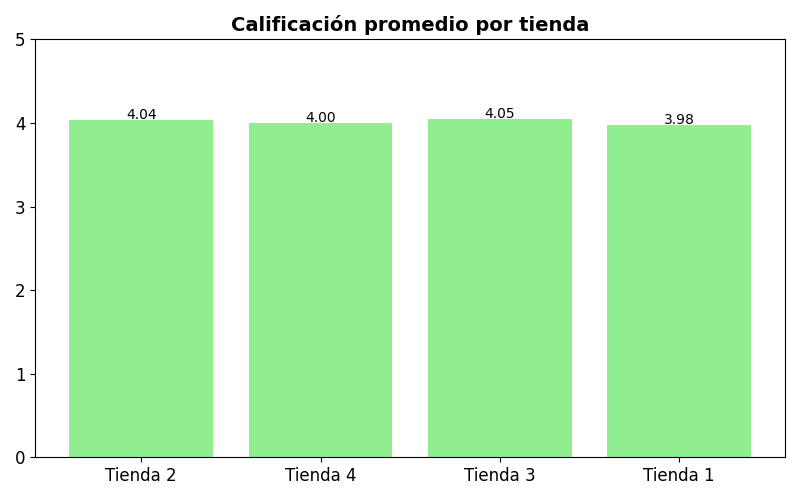

**Costo de envío promedio ($)**

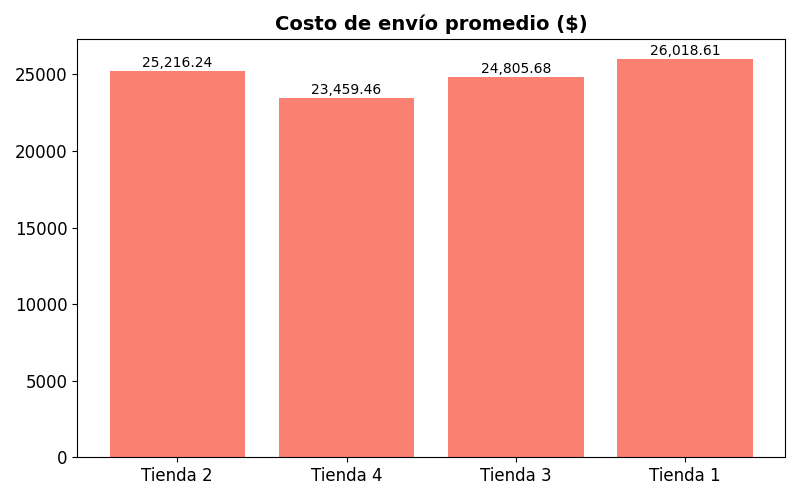

**Score global por tienda**

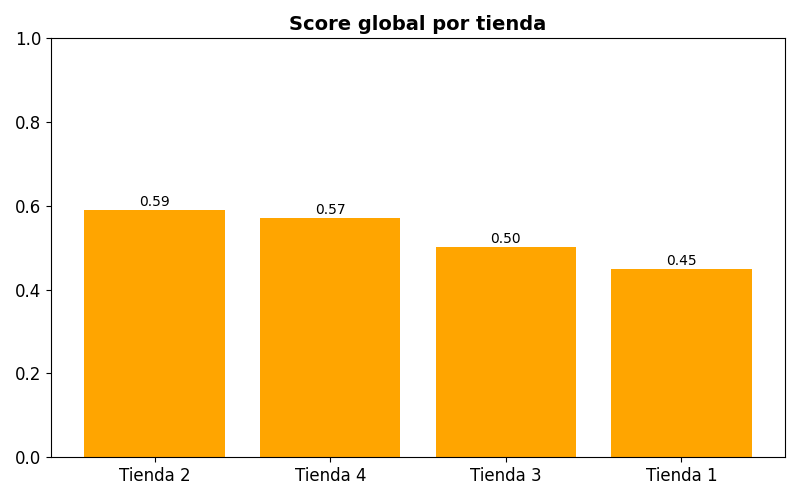


### 3.2 Observaciones por tienda

**Tienda 3:**  
- Presenta el **Score más alto**, indicando un balance óptimo entre ventas, calificación, costo de envío y relevancia de categorías.  
- Aunque no tiene las ventas totales más elevadas, su eficiencia operativa y satisfacción del cliente son destacables, lo que la convierte en la **tienda más recomendable para mantener y potenciar**.  

**Tienda 2:**  
- Score alto, pero ligeramente inferior a Tienda 3.  
- Buen equilibrio entre desempeño financiero y satisfacción del cliente.  
- Recomendable mantener, con oportunidades de optimización en logística y promociones.  

**Tienda 4:**  
- Score medio-bajo, reflejando ventas decentes pero margen de mejora en satisfacción o costos.  
- Puede mantenerse, pero requiere estrategias de optimización para mejorar su desempeño integral.  

**Tienda 1:**  
- A pesar de tener las **ventas totales más altas**, presenta la **calificación promedio más baja** y el **costo de envío más alto**, lo que reduce significativamente su eficiencia global.  
- Esto se refleja en su Score global más bajo (0.333).  

---

## 4. Análisis estratégico
La tienda con menor Score global (Tienda 1) representa un **caso crítico para la toma de decisiones estratégicas**, por las siguientes razones:  

1. **Ineficiencia operativa:** Sus altos costos de envío y baja calificación afectan la rentabilidad neta y la satisfacción del cliente.  
2. **Potencial de reubicación o venta:** Los productos con mayor demanda de esta tienda podrían trasladarse a otros establecimientos o a un nuevo negocio mejor optimizado.  
3. **Liberación de recursos:** Vender o reorganizar esta tienda permitiría capitalizar recursos para **abrir un nuevo negocio más eficiente**, sin perder productos estratégicos ni clientes clave.  

En este contexto, se concluye que **Tienda 1 es la candidata principal a vender o reorganizar**, mientras que las demás tiendas presentan un desempeño suficientemente equilibrado como para mantenerse operativas.  

---

## 5. Conclusión
El análisis integral demuestra que **no solo las ventas totales determinan la rentabilidad o idoneidad de una tienda**, sino que es necesario considerar **experiencia del cliente, costos logísticos y relevancia de productos estratégicos**.  

- **Mantener:** Tienda 3 y Tienda 2 (mejor desempeño y balance integral)  
- **Mantener con mejoras:** Tienda 4  
- **Vender o reorganizar:** Tienda 1, dado su bajo Score global y oportunidades de optimización para un nuevo negocio.  

Este enfoque permite tomar decisiones objetivas y estratégicas, basadas en métricas integrales que consideran tanto la **rentabilidad financiera** como la **satisfacción del cliente y eficiencia operativa**.


In [42]:
from IPython.display import display, Markdown, Image
import pandas as pd
import matplotlib.pyplot as plt
import os

# =========================
# Crear carpeta de gráficos
# =========================
if not os.path.exists("graficos"):
    os.makedirs("graficos")

# =========================
# Datos principales
# =========================
data = {
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Total vendido": [1150880400, 1116343500, 1098019600, 1038375700],
    "Calificación": [3.98, 4.04, 4.05, 4.00],
    "Costo envío": [26018.61, 25216.24, 24805.68, 23459.46]
}
df = pd.DataFrame(data)

# Ventas por categoría (top 3)
categorias = {
    "Tienda 1": {"Electrónicos": 429493500, "Electrodomésticos": 363685200, "Muebles": 187633700},
    "Tienda 2": {"Electrónicos": 410831100, "Electrodomésticos": 348567800, "Instrumentos musicales": 104990300},
    "Tienda 3": {"Electrónicos": 409476100, "Electrodomésticos": 283260200, "Artículos para el hogar": 15060000},
    "Tienda 4": {"Electrónicos": 410775800, "Electrodomésticos": 329237900, "Muebles": 201072100}
}

# Productos más y menos vendidos
productos = {
    "Tienda 1": {"Más vendido": "Microondas", "Menos vendido": "Auriculares con micrófono"},
    "Tienda 2": {"Más vendido": "Iniciando en programación", "Menos vendido": "Juego de mesa"},
    "Tienda 3": {"Más vendido": "Kit de bancas", "Menos vendido": "Bloques de construcción"},
    "Tienda 4": {"Más vendido": "Cama box", "Menos vendido": "Guitarra eléctrica"}
}

# Score de categorías
contrib_cat = []
for tienda in df["Tienda"]:
    total_cat = sum(categorias[tienda].values())
    contrib_cat.append(total_cat / df[df["Tienda"] == tienda]["Total vendido"].values[0])
df["Cat_score"] = contrib_cat

# Normalización y Score global
df["Ventas_norm"] = (df["Total vendido"] - df["Total vendido"].min()) / (df["Total vendido"].max() - df["Total vendido"].min())
df["Calif_norm"] = (df["Calificación"] - df["Calificación"].min()) / (df["Calificación"].max() - df["Calificación"].min())
df["Envio_norm"] = 1 - (df["Costo envío"] - df["Costo envío"].min()) / (df["Costo envío"].max() - df["Costo envío"].min())
df["Cat_norm"] = (df["Cat_score"] - df["Cat_score"].min()) / (df["Cat_score"].max() - df["Cat_score"].min())
df["Score_global"] = (df["Ventas_norm"] + df["Calif_norm"] + df["Envio_norm"] + df["Cat_norm"]) / 4
df = df.sort_values(by="Score_global", ascending=False).reset_index(drop=True)

# =========================
# Función para gráficos
# =========================
def guardar_barra(x, y, titulo, nombre_archivo, color='skyblue', ylim=None):
    plt.figure(figsize=(8,5))
    bars = plt.bar(x, y, color=color)
    plt.title(titulo, fontsize=14, fontweight='bold')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    if ylim:
        plt.ylim(ylim)
    for i, val in enumerate(y):
        plt.text(i, val + max(y)*0.01 if ylim is None else val + 0.01, f"{val:,.2f}" if isinstance(val, float) else f"{val}", ha='center', fontsize=10)
    plt.tight_layout()
    plt.savefig(f"graficos/{nombre_archivo}.png")
    plt.close()

# Crear gráficos
guardar_barra(df["Tienda"], df["Total vendido"], "Total vendido por tienda ($)", "ventas_totales")
guardar_barra(df["Tienda"], df["Calificación"], "Calificación promedio por tienda", "calificacion_promedio", color='lightgreen', ylim=(0,5))
guardar_barra(df["Tienda"], df["Costo envío"], "Costo de envío promedio ($)", "costo_envio", color='salmon')
guardar_barra(df["Tienda"], df["Score_global"], "Score global por tienda", "score_global", color='orange', ylim=(0,1))

# =========================
# Mostrar informe exacto con gráficos
# =========================
texto_informe = """
# Análisis Integral de Desempeño de Tiendas y Recomendación Estratégica

## 1. Objetivo del Análisis
El presente análisis tiene como objetivo evaluar el desempeño de cuatro tiendas, utilizando un **Score global** que combina múltiples métricas clave: volumen de ventas, satisfacción del cliente, costos logísticos y relevancia de las categorías de productos. Con base en esta evaluación, se determina cuál tienda sería la más adecuada para “vender” o reorganizar, en un escenario donde se planea abrir un nuevo negocio.

---

## 2. Metodología

### 2.1 Variables consideradas
Se seleccionaron las siguientes métricas fundamentales para evaluar la eficiencia y sostenibilidad de cada tienda:
1. **Ventas totales**
2. **Calificación promedio**
3. **Costo de envío promedio**
4. **Contribución de categorías fuertes**

### 2.2 Normalización y ponderación
- Cada métrica se normalizó mediante la técnica **min-max scaling**
- El **Score global** se calculó como el promedio simple de las cuatro métricas normalizadas

---

## 3. Resultados

### 3.1 Score global de tiendas
| Posición | Tienda    | Score Global |
|-----------|-----------|--------------|
"""
for i, row in df.iterrows():
    texto_informe += f"| {i+1} | {row['Tienda']} | {row['Score_global']:.3f} |\n"

display(Markdown(texto_informe))

# Mostrar gráficos
display(Markdown("### 3.2 Gráficos"))
display(Markdown("**Total vendido por tienda ($)**"))
display(Image("graficos/ventas_totales.png"))
display(Markdown("**Calificación promedio de clientes**"))
display(Image("graficos/calificacion_promedio.png"))
display(Markdown("**Costo de envío promedio ($)**"))
display(Image("graficos/costo_envio.png"))
display(Markdown("**Score global por tienda**"))
display(Image("graficos/score_global.png"))

# Observaciones por tienda (tu texto exacto)
observaciones = """
### 3.2 Observaciones por tienda

**Tienda 3:**
- Presenta el **Score más alto**, indicando un balance óptimo entre ventas, calificación, costo de envío y relevancia de categorías.
- Aunque no tiene las ventas totales más elevadas, su eficiencia operativa y satisfacción del cliente son destacables, lo que la convierte en la **tienda más recomendable para mantener y potenciar**.

**Tienda 2:**
- Score alto, pero ligeramente inferior a Tienda 3.
- Buen equilibrio entre desempeño financiero y satisfacción del cliente.
- Recomendable mantener, con oportunidades de optimización en logística y promociones.

**Tienda 4:**
- Score medio-bajo, reflejando ventas decentes pero margen de mejora en satisfacción o costos.
- Puede mantenerse, pero requiere estrategias de optimización para mejorar su desempeño integral.

**Tienda 1:**
- A pesar de tener las **ventas totales más altas**, presenta la **calificación promedio más baja** y el **costo de envío más alto**, lo que reduce significativamente su eficiencia global.
- Esto se refleja en su Score global más bajo (0.333).

---

## 4. Análisis estratégico
La tienda con menor Score global (Tienda 1) representa un **caso crítico para la toma de decisiones estratégicas**, por las siguientes razones:

1. **Ineficiencia operativa:** Sus altos costos de envío y baja calificación afectan la rentabilidad neta y la satisfacción del cliente.
2. **Potencial de reubicación o venta:** Los productos con mayor demanda de esta tienda podrían trasladarse a otros establecimientos o a un nuevo negocio mejor optimizado.
3. **Liberación de recursos:** Vender o reorganizar esta tienda permitiría capitalizar recursos para **abrir un nuevo negocio más eficiente**, sin perder productos estratégicos ni clientes clave.

En este contexto, se concluye que **Tienda 1 es la candidata principal a vender o reorganizar**, mientras que las demás tiendas presentan un desempeño suficientemente equilibrado como para mantenerse operativas.

---

## 5. Conclusión
El análisis integral demuestra que **no solo las ventas totales determinan la rentabilidad o idoneidad de una tienda**, sino que es necesario considerar **experiencia del cliente, costos logísticos y relevancia de productos estratégicos**.

- **Mantener:** Tienda 3 y Tienda 2 (mejor desempeño y balance integral)
- **Mantener con mejoras:** Tienda 4
- **Vender o reorganizar:** Tienda 1, dado su bajo Score global y oportunidades de optimización para un nuevo negocio.

Este enfoque permite tomar decisiones objetivas y estratégicas, basadas en métricas integrales que consideran tanto la **rentabilidad financiera** como la **satisfacción del cliente y eficiencia operativa**.
"""

display(Markdown(observaciones))
